In [1]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/old_tools/CProf_11.root")
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/cprofiles_integrals.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

In [3]:
f.classnames()

{'I_0;1': 'TH3D',
 'I_1;1': 'TH3D',
 'I_2;1': 'TH3D',
 'I_iso_1;1': 'TH1D',
 'I_iso_2;1': 'TH1D',
 'gsthr;1': 'TGraph',
 'gNphot;1': 'TGraph'}

In [3]:
oh, or0bins, oth0bins, oebins = of["hI3d_1"].to_numpy()
h ,  r0bins,  th0bins,  ebins =  f["I_1"]   .to_numpy()

np.testing.assert_allclose(or0bins, r0bins)
np.testing.assert_allclose(oth0bins, th0bins)

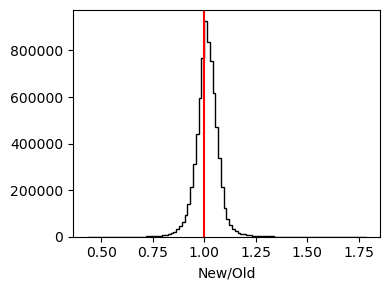

In [36]:
plt.figure(figsize=[4, 3])

plt.hist((h/oh).flatten(), histtype="step", bins=100, color="k")
plt.xlabel("New/Old")
plt.axvline(1, color="r")

plt.tight_layout()

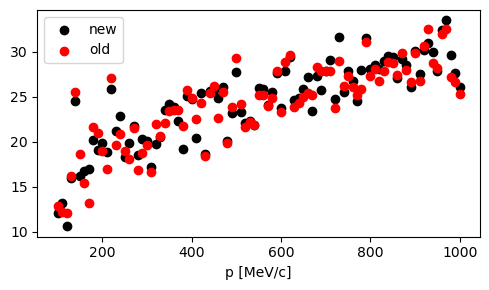

In [37]:
r0bin  = 190
th0bin = 60

plt.figure(figsize=[5, 3])

es = (ebins[1:] + ebins[:-1])/2.
plt.scatter(es, h[r0bin, th0bin], label="new", color="k")

#es = (oebins[1:] + oebins[:-1])/2.
plt.scatter(es, oh[r0bin, th0bin], label="old", color="red")

plt.xlabel("p [MeV/c]")
plt.legend()
plt.tight_layout()

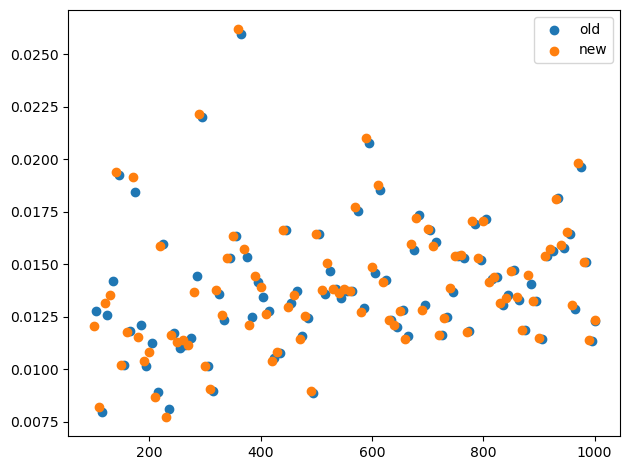

In [7]:
r0bin  = 5
th0bin = 5

plt.figure()

es = (oebins[1:] + oebins[:-1])/2.
plt.scatter(es, oh[r0bin, th0bin], label="old")

es = (ebins[1:] + ebins[:-1])/2.
plt.scatter(es, h[r0bin, th0bin], label="new")

# h, ebins = of["hI_iso_1"].to_numpy()
# plt.scatter(ebins[:-1], h, label="old")

plt.legend()
plt.tight_layout()

In [45]:
iso , ebins  =  f["I_iso_2"] .to_numpy()
oiso, oebins = of["hI_iso_2"].to_numpy()

np.testing.assert_allclose(oiso, iso)

In [46]:
e, nph   = f["gNphot"] .values()
oe, onph = of["gNphot"].values()

np.testing.assert_allclose(oe, e)
np.testing.assert_allclose(onph, nph)

In [47]:
e, sth   = f["gsthr"] .values()
oe, osth = of["gsthr"].values()

np.testing.assert_allclose(oe, e)
np.testing.assert_allclose(osth, sth)